In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import uproot

In [2]:
import pandas as pd

In [3]:
xs_qcd = {
    'JZ0W': 79310000*0.96937/(995000.),
    'JZ1W': 79310000*0.00031147/(995000.),
    'JZ2W': 64165*5.3983E-03/(993800.),
    'JZ3W': 1666.4*0.0019085/(992000.)
}

In [4]:
f_qcd = {
    'JZ0W': uproot.open("/gpfs/slac/atlas/fs1/d/rafaeltl/public/L1BTag/FTAGntups/QCD/JZ0W.root"),
    'JZ1W': uproot.open("/gpfs/slac/atlas/fs1/d/rafaeltl/public/L1BTag/FTAGntups/QCD/JZ1W.root"),
    'JZ2W': uproot.open("/gpfs/slac/atlas/fs1/d/rafaeltl/public/L1BTag/FTAGntups/QCD/JZ2W.root"),
    'JZ3W': uproot.open("/gpfs/slac/atlas/fs1/d/rafaeltl/public/L1BTag/FTAGntups/QCD/JZ3W.root")
}

In [19]:
t_qcd = {}
for q in f_qcd:
    print(q)
    t_qcd[q] = f_qcd[q]['bTag_AntiKt4EMTopoJets'].arrays()

JZ0W
JZ1W
JZ2W
JZ3W


In [6]:
t_qcd['JZ0W'].keys()

dict_keys([b'runnb', b'eventnb', b'mcchan', b'mcwg', b'avgmu', b'actmu', b'PVx', b'PVy', b'PVz', b'truth_PVx', b'truth_PVy', b'truth_PVz', b'njets', b'jet_pt', b'jet_eta', b'jet_phi', b'jet_E', b'jet_m', b'jet_nConst', b'jet_dRiso', b'jet_LabDr_HadF', b'jet_aliveAfterOR', b'jet_aliveAfterORmu', b'jet_ntrk', b'jet_trk_pt', b'jet_trk_eta', b'jet_trk_phi', b'jet_trk_dr', b'jet_trk_ptfrac', b'jet_trk_ip3d_d0', b'jet_trk_ip3d_z0', b'jet_trk_ip3d_d0sig', b'jet_trk_ip3d_z0sig', b'truth_lead_jet_pt', b'truth_lead_jet_eta', b'truth_lead_jet_phi', b'truth_lead_jet_e', b'truthwz_lead_jet_pt', b'truthwz_lead_jet_eta', b'truthwz_lead_jet_phi', b'truthwz_lead_jet_e', b'avg_reco_jet_pt'])

In [7]:
jarrs = [b'jet_pt', b'jet_eta', b'jet_phi', b'jet_E', b'jet_m', b'jet_nConst', b'jet_dRiso', b'jet_LabDr_HadF', b'jet_aliveAfterOR', b'jet_aliveAfterORmu']

In [86]:
p_qcd = {}
avg_jet_pt = {}

for q in t_qcd:
    print(q)
    p_qcd[q] = {}
    nentries = t_qcd[q][b'jet_pt'].shape[0]
    for jar in jarrs:
        this_jar = str(jar, 'utf-8')
        p_qcd[q][this_jar] = -99*np.ones( (nentries, 10) )
    avg_jet_pt[q] = -99*np.ones(nentries)

    for i in range(0, nentries):
        njets = t_qcd[q][b'jet_pt'][i].shape[0]
        min_jets = min(10, njets)
        
        if njets > 0:
            avg_jet_pt[q][i] = 0
            max4_njets = min( 4, njets )
            for ij in range( max4_njets ):
                avg_jet_pt[q][i] += t_qcd[q][b'jet_pt'][i][ij]
            avg_jet_pt[q][i] = avg_jet_pt[q][i]/float(max4_njets)
            
        
        for jar in jarrs:
            this_jar = str(jar, 'utf-8')
            p_qcd[q][this_jar][i, :min_jets] = t_qcd[q][jar][i, :min_jets]

JZ0W
JZ1W
JZ2W
JZ3W


In [89]:
print(avg_jet_pt['JZ0W'].shape, p_qcd['JZ0W']['jet_pt'].shape)

(995000,) (995000, 10)


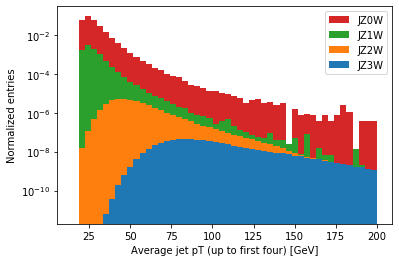

In [92]:
plt.Figure()
hists = []
weights = []
labs = []

samples = ['JZ3W', 'JZ2W', 'JZ1W', 'JZ0W']

for q in samples:
    hists.append( avg_jet_pt[q]*1e-3 )
    weights.append( t_qcd[q][b'mcwg']*xs_qcd[q] )
    labs.append( q )

plt.hist(
        hists, histtype='stepfilled',
        bins=50, range=(15,200),
        label=labs, stacked=True,
        weights=weights, density=1
    )

plt.yscale('log')
plt.legend()
plt.xlabel(f'Average jet pT (up to first four) [GeV]')
plt.ylabel('Normalized entries')
# plt.savefig(f"nocut_jet_{ij}.pdf")
plt.show()

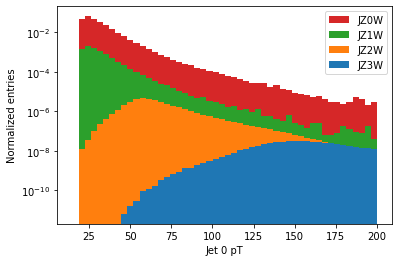

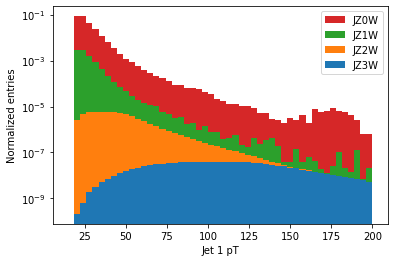

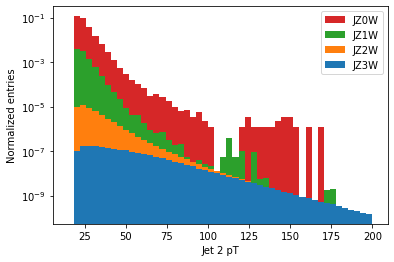

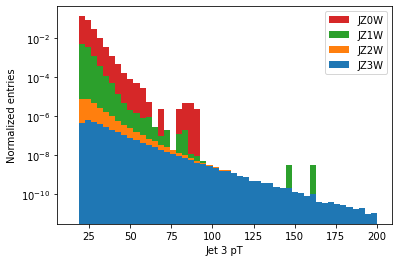

In [39]:
for ij in [0,1,2,3]:
    plt.Figure()
    hists = []
    weights = []
    labs = []

    samples = ['JZ3W', 'JZ2W', 'JZ1W', 'JZ0W']

    for q in samples:
        hists.append( p_qcd[q]['jet_pt'][:,ij]*1e-3 )
        weights.append( t_qcd[q][b'mcwg']*xs_qcd[q] )
        labs.append( q )

    plt.hist(
            hists, histtype='stepfilled',
            bins=50, range=(15,200),
            label=labs, stacked=True,
            weights=weights, density=1
        )

    plt.yscale('log')
    plt.legend()
    plt.xlabel(f'Jet {ij} pT')
    plt.ylabel('Normalized entries')
    plt.savefig(f"nocut_jet_{ij}.pdf")
    plt.show()

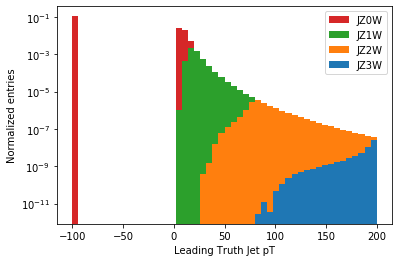

In [40]:
plt.Figure()
hists = []
weights = []
labs = []

samples = ['JZ3W', 'JZ2W', 'JZ1W', 'JZ0W']

for q in samples:
    this_arr = np.copy(t_qcd[q][b'truth_lead_jet_pt'])
    this_arr[this_arr > 0] = this_arr[this_arr > 0]*1e-3
    hists.append( this_arr )
    weights.append( t_qcd[q][b'mcwg']*xs_qcd[q] )
    labs.append( q )

plt.hist(
        hists, histtype='stepfilled',
        bins=50, range=(-100,200),
        label=labs, stacked=True,
        weights=weights, density=1
    )

plt.yscale('log')
plt.legend()
plt.xlabel('Leading Truth Jet pT')
plt.ylabel('Normalized entries')
plt.savefig("leading_truth_jet_pt.pdf")
plt.show()

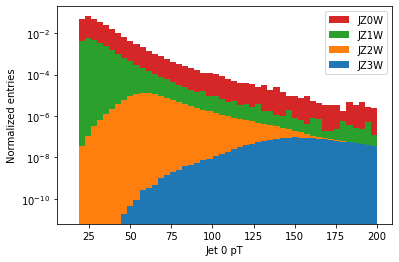

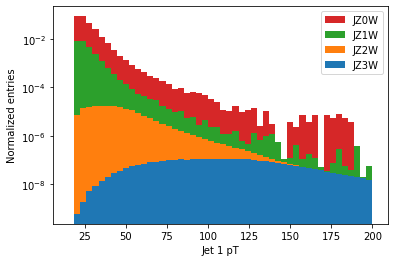

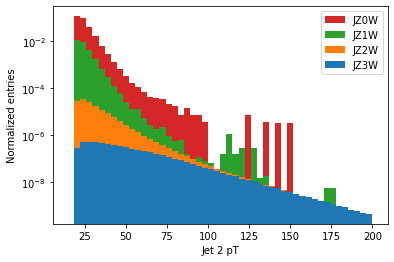

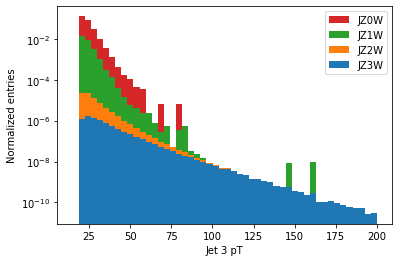

In [41]:
for ij in [0,1,2,3]:
    plt.Figure()
    hists = []
    weights = []
    labs = []

    samples = ['JZ3W', 'JZ2W', 'JZ1W', 'JZ0W']

    for q in samples:
        this_indx = t_qcd[q][b'truth_lead_jet_pt'] > 0
        hists.append( p_qcd[q]['jet_pt'][:,ij][this_indx]*1e-3 )
        weights.append( t_qcd[q][b'mcwg'][this_indx]*xs_qcd[q] )
        labs.append( q )

    plt.hist(
            hists, histtype='stepfilled',
            bins=50, range=(15,200),
            label=labs, stacked=True,
            weights=weights, density=1
        )

    plt.yscale('log')
    plt.legend()
    plt.xlabel(f'Jet {ij} pT')
    plt.ylabel('Normalized entries')
    plt.savefig(f"truthjetcut_jet_{ij}.pdf")
    plt.show()

In [103]:
plt.Figure()
hists = []
weights = []
labs = []

samples = ['JZ3W', 'JZ2W', 'JZ1W', 'JZ0W']

for q in samples:
    this_indx = (t_qcd[q][b'truth_lead_jet_pt'] > 0) & (avg_jet_pt[q]>0)
    this_arr = avg_jet_pt[q][this_indx]/t_qcd[q][b'truth_lead_jet_pt'][this_indx]
    hists.append( this_arr )
    weights.append( t_qcd[q][b'mcwg'][this_indx]*xs_qcd[q] )
    labs.append( q )


plt.hist(
        hists, histtype='step',
        bins=50, range=(0,5),
        label=labs, stacked=False,
        weights=weights, density=1
    )
plt.legend()
plt.yscale('log')
plt.xlabel('<4 leading reco jets pT>/Truth leading jet pT')
plt.ylabel('Normalized entries')
plt.savefig("avg_4reco_over_truth_lead.pdf")
plt.show()

plt.hist(
        [np.log(h) for h in hists], histtype='step',
        bins=50, range=(-2,4),
        label=labs, stacked=False,
        weights=weights, density=1
    )
plt.legend()
plt.yscale('log')
plt.xlabel('log <4 leading reco jets pT>/Truth leading jet pT')
plt.ylabel('Normalized entries')
plt.savefig("avg_4reco_over_truth_lead_log.pdf")
plt.show()

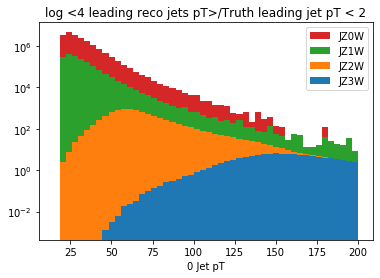

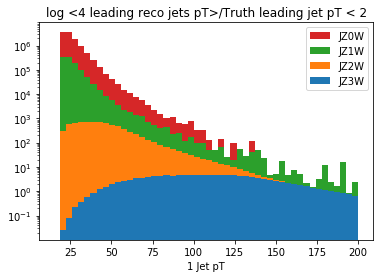

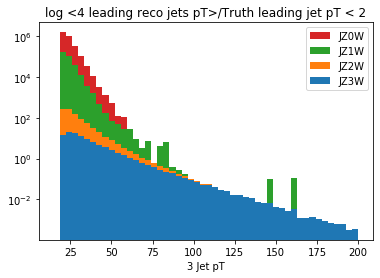

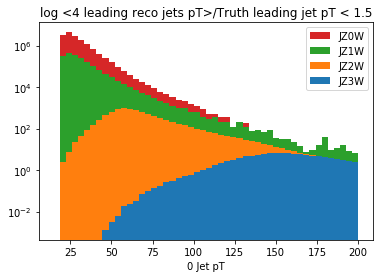

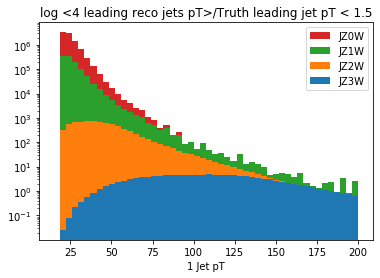

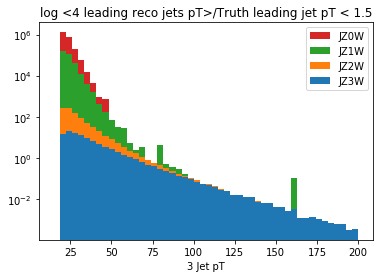

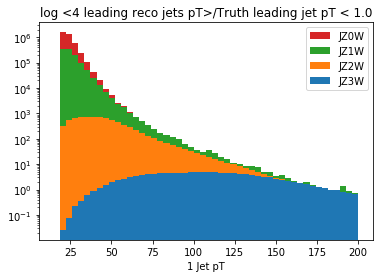

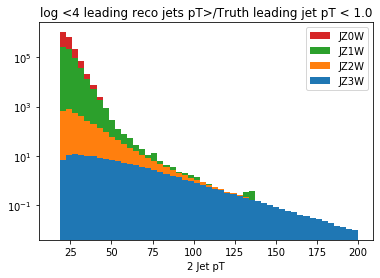

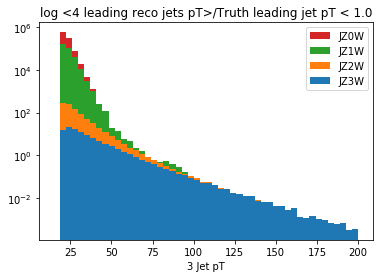

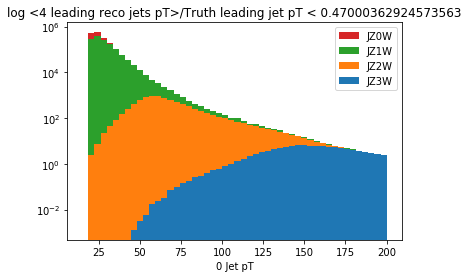

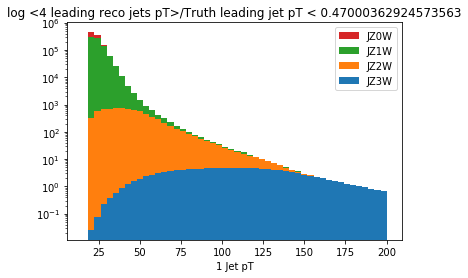

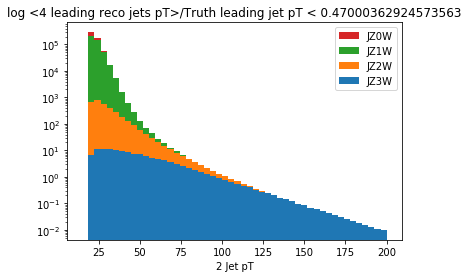

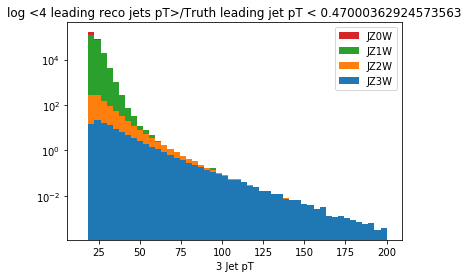

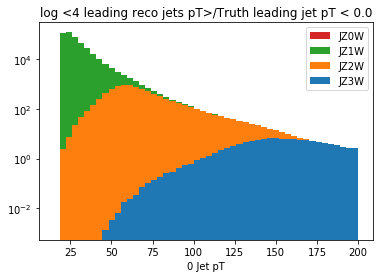

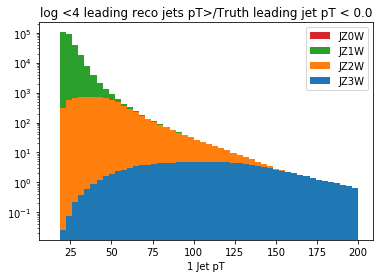

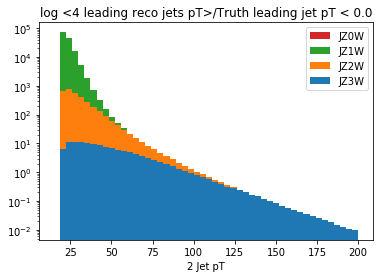

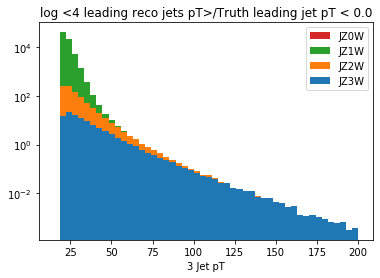

In [106]:
# cut_val = 0.5
for cut_val in [2, 1.5, 1.0, np.log(1.6), 0.]:
    for ij in [0,1,2,3]:
        plt.Figure()
        hists = []
        weights = []
        labs = []
    
        samples = ['JZ3W', 'JZ2W', 'JZ1W', 'JZ0W']
    
        for q in samples:
            this_indx = (t_qcd[q][b'truth_lead_jet_pt'] > 0) & (avg_jet_pt[q]>0)
            this_rat = np.log( avg_jet_pt[q][this_indx]/t_qcd[q][b'truth_lead_jet_pt'][this_indx] )
            
            this_new_indx = this_rat < cut_val
            hists.append( p_qcd[q]['jet_pt'][:,ij][this_indx][this_new_indx]*1e-3 )
            weights.append( t_qcd[q][b'mcwg'][this_indx][this_new_indx]*xs_qcd[q] )
            labs.append( q )
    
        plt.hist(
                hists, histtype='stepfilled',
                bins=50, range=(15,200),
                label=labs, stacked=True,
                weights=weights
            )
    
        plt.yscale('log')
        plt.legend()
        plt.xlabel(f'{ij} Jet pT')
        plt.title(f'log <4 leading reco jets pT>/Truth leading jet pT < {cut_val}')
        plt.savefig(f"avg4Otruth_{cut_val}_jet_{ij}.pdf")
        plt.show()